# Assignment Three: Sparse Random Projections
### Group 10: Debasmita Duta, Skyler MacGowan, Yannik Suhre, Sebastian Sydow
### Due: May 5, 2021

# Note for the Devs (Sebastian, Skyler, Debasmita, Yannik)

If you want to execute this an test it several times with different links, you can set the parameter `birthday_version = False` or delete it for that matter. I programmed a little quiz into it for Jan, thought he'd enjoy, please try it yourself too and let me know if you find any mistakes/errors. Otherwise feel free to add some more fun logic to that game ;). 

In [27]:
import pandas as pd
from IPython.display import display, Markdown, Math
import time
import importlib
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np

class RandomSparseRepresentation:
    """This class executes the RandomSparseRepresentation"""
    def __init__(self, birthday_version = False):
        if birthday_version:
            self._jans_birthday()
            self._printmd("---")
        self._printmd(
"""Welcome to the interface of **RandomSparseRepresentation**! :)
        
You have now instantiated an object, with which you can create a RandomSparseRepresentation.
In order to do so, please first pick a dataset from this website [UCI ML](https://archive.ics.uci.edu/ml/index.php).

Once you have done so, please use the function ```get_data()``` on your object to download that data. 
This function takes one necessary parameter and an optional one. The necessary one is the URL to
the dataset you obtain when you right click in the data folder on the dataset and copy that link.
Should the dataset not be a `.csv` within the datafolder on the UCI website, but rather a `.data`
please also provide the column names as a list, which you can find in the `.names` file in the datafolder.""")
        
    def get_data(self, url: str, data_type: str = None, names: list = None, **kwargs):
        try:
            if names and data_type in [".csv", ".data"]:
                self.data = pd.read_csv(url, names = names, **kwargs)
            elif data_type in [".xls", ".xlsx"]:
                self.data = pd.read_excel(url, header = 0)
                self.data = self.data.dropna()
            elif url and data_type in [".csv", ".data"]:
                self.data = pd.read_csv(url)
            else:
                raise AttributeError(f"""The chosen you `data_type = {data_type}` is currently not supported
                                     by this function. All supported `data_types` are `.csv`, `.data`, 
                                     `.xls`, `.xlsx` and everything else which can be read with `pd.read_csv
                                     or `pd.read_excel`.""")
            self._printmd(
"""You successfully downloaded your dataset to the object!

Now we can go ahead and split the data.
Please call the `split_data()` function for it. You can pass it the `test_size` parameter, to split your
data into test and train sets, the default value is `0.3`. Here are the first 5 rows of our data:""")
            display(self.data.head(5))
        except BaseException as e:
            print(e)
    
    def split_data(self, test_size = 0.3, standardize = True, columns_to_drop: list = None):
        self._printmd(
f"""The first thing we need to do, is to determine which of the columns shall be our target variable.
Hence they are all printed out in the next step.

{[x for x in self.data.columns]}

In the next step please input a column name, which is contains your target variable.""")
        time.sleep(1)
        while True:
            target = input(prompt = "Please input your target variable here: ")
            if target not in self.data.columns:
                self._printmd(f"`{target}` could not be found in axis, please review your target choice")
                continue
            self.X, self.y = self.data.drop(target, axis = 1), self.data[target]
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y,
                                                                                        test_size = test_size,
                                                                                        random_state = 0)
            if standardize:
                # Standardize the Data
                sc = StandardScaler()
                self.X_train = sc.fit_transform(self.X_train)
                self.X_test = sc.transform(self.X_test)
            if columns_to_drop:
                self.X_train, self.X_test = self.X_train.drop(columns_to_drop, axis = 1), self.X_test.drop(columns_to_drop, axis = 1)                
            break
            
        self._printmd(
f"""Your data has now be splitted into a train and test set by a ratio of `{test_size}`.
This was done, by selecting the column `{target}` as target column and the rest as independent variables.""")
    
    def JL_lemma(self, epsilon=0.1):
        """Sebastian & Skyler will write something about the JL lemma, why it works with small datasets."""
        
        self._printmd(
f"""In general, the theory of Professor Johnson and Professor Lindenstrauss posits
the amount of columns to which we can reduce our dataset without losing any distance related information.
We can specify a parameter called `epsilon` which determines the margin in which the distance is contained.

Our current dataset has {self.data.shape[0]} observations. Using the JL algorithm, we could reduce it to
{johnson_lindenstrauss_min_dim(self.data.shape[0], eps = epsilon)} dimensions.""")
        if johnson_lindenstrauss_min_dim(self.data.shape[1], eps = epsilon) > self.data.shape[1]:
            self._printmd(
"""The JL also works, if we have a smaller dataset... **Ask group**!""")
        self._printmd(
"""The next step is to set a define a baseline metric, on which we want to evaluate
our algorithm with our later reduced dataset. For this please call the function `baseline()`.""")
        
    def baseline(self, model = None, **kwargs):
        if not model:
            raise AttributeError("Please specify the model for your baseline metric! This can be done like \
`model = LinearSVC`, whereas LinearSVC refers to the function from sklearn.svm.")
        try:
            self.mod = model(**kwargs)
            self.mod.fit(self.X_train, self.y_train)
        except BaseException as e:
            raise e
        self._printmd(
r"""In order to asses the performance of a classifier, it is important to incorporate a numerical evaluation of the algorithm. 
For this, a variety of performance measures are available. It is essential to make use of an adequate performance measure as 
their applicability and significance depend on the dataset as well as the specific classification task.
There are a few metrics we can choose from, the needed API (which you need to input next) can be viewed
[here](https://scikit-learn.org/stable/modules/model_evaluation.html). For the task at hand, the performance 
measures used are either *accuracy* or the $f_1$ *score*.

$$
Accuracy = \frac{True\ Positives + True\ Negatives }{True\ Positives + False\ Positives + True\ Negatives + False\ Negatives}
$$

*Accuracy* measures the performance of a classification model as the number of correct 
predictions divided by the total number of predictions. Its main advantage is its easy interpretability. 
Nevertheless, *accuracy* should only be used for balanced datasets. When dealing with imbalanced datasets,
i.e. when some classes are much more frequent than others, *accuracy* is not a reliable performance measure. 

$$
f_1 = 2 * \frac{Precision * Recall}{Precision + Recall}
$$

The $f_1$ Score is the harmonic mean of *precision* and *recall*, i.e. it applys equal weight to both. 
The $f_1$ Score represents a meaningful evaluation for imbalanced datasets. As such, we recommend to
choose `accuracy_score` for balanced datasets and `f1_score` for imbalanced datasets.

Additionally, for imbalanced datasets, i.e. situations in which the `f1_score` is chosen, the user should differentiate
between binary and multi-class classification. For multi-class classification, the 
parameter *average* ought to be specified, as its default is only applicable if targets are
[binary](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).
Four other parameter values are possible: *micro*, *macro*, *weighted* and *samples*. *Samples* is only 
meaningful for multilabel classification, which will not be in the scope of this assignment. Thus, we will 
only examine *micro*, *macro* and *weighted*. 

The *macro* $f_1$ *score* is computed as a simple arithmetic mean of the per-class $f_1$ *scores*. 
It does not take label imbalance into account.

The *weighted* $f_1$ *score* alters *macro* to account for label imbalance. The weight is applied by 
the number of true instances for each label.

The *micro* $f_1$ *score* is calculated counting the total true positives, false negatives and false positives.
Thus, the *micro* $f_1$ *score* is equal to total number of true positives over the total number of all observations.
Further explanations can be found
[here](https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification.).

In conclusion, we recommend to chose `average = weighted` for the performance metric `f1_score` for the 
purpose of this assignment as this will account for the imbalance in the dataset. 

The chosen metric used for our baseline should be inputted in the following prompt. Be sure to insert it 
like `accuracy_score` if you want to use `accuracy_score` or respective for all other metrics.""")
        
        while True:
            self.metric = input(prompt = "Please insert your metric here: ")
            if self.metric not in ["accuracy_score","balanced_accuracy_score", "top_k_accuracy_score",
                               "average_precision_score" , "brier_score_loss", "f1_score",  "log_loss",
                               "precision_score", "recall_score", "jaccard_score", "roc_auc_score"]:
                self._printmd("""You have chosen a metric which is not available here. Please see this
                list for further info, please input the metric exactly like depicted here:
                `accuracy_score`,`balanced_accuracy_score`, `top_k_accuracy_score`, `average_precision_score`,
                `brier_score_loss`, `f1_score`,  `log_loss`, `precision_score`, `recall_score`, `jaccard_score`,
                `roc_auc_score`.""")
                continue
            if self.metric == "f1_score":
                self._printmd("""You have selected the `f1_score`. Since the `f1_score` can have different
                usages as described earlier, depending on its inputs please input some keyword-arguments into
                the next prompt.
                Please be advised, that this is done via `average="binary", ...`, meaning with a = as separator.""")
                while True:
                    self.kwargs = input(prompt = "Please enter your keyword arguments here: ")
                    try:
                        keyword, sep, value = self.kwargs.partition('=')
                        self.kwargs = {keyword: value.strip('"')}
                        self.baseline = getattr(metrics, self.metric)(self.mod.predict(self.X_test), self.y_test,
                                                                      **self.kwargs)
                        break
                    except ValueError as e:
                        print(e)
                        continue
            else:
                self.baseline = getattr(metrics, self.metric)(self.mod.predict(self.X_test), self.y_test)
            self._printmd(
    """Awesome, you have set your baseline! Now call the function `apply_random_projection` to check out,
    how good your model performs when we reduce its dimensions.""")
            break
        
    def apply_random_projection(self, model = None, **kwargs):
        self._printmd(r"""
Random Projection is a dimensionality reduction technique which is based on the **Johnson-Lindenstrauss lemma**.
This method projects or transforms the higher dimensional data to a lower dimensional subspace.
It approximately preserves the pairwise distances of the data points. 
It uses a random matrix to perform the projection and hence the name random projection.

There are few techniques to create the random matrix. Gaussian and Sparse are just 2 among them.

**Gaussian** – The random matrix is created in such a way that each entry is independently drawn from
the standard normal distribution $N(0, \frac{1}{n_{components}})$. Where $n_{components} = target$ dimension. That matrix
is also sometimes refered to as map.

**Sparse** – When a sparse matrix is used for the random projection to reduce the computational complexity, then this 
is a sparse projection. If the sparse
projection matrix has $c$ nonzero entries per column, then the complexity of the projection operation is of order $O(ckN)$
instead of $O(dkN)$, where $N$ is the number of observations.

Now we can apply our random projection onto our dataset, which we loaded earlier. Once that function is done
you can head over to the next function which is called `plot`. That function will plot the baseline and your
chosen metric over the different dimensions.""")
        self.accuracies = []
        self.dims = np.int32(np.linspace(1, self.data.shape[1], int(self.data.shape[1]/1)))
        # Loop over the projection sizes, k
        for dim in self.dims:
            # Create random projection
            sp = SparseRandomProjection(n_components = dim)
            X = sp.fit_transform(self.X_train)

            # Train classifier of your choice on the sparse random projection
            self.model = model(**kwargs)
            self.model.fit(X, self.y_train)

            # Evaluate model and update accuracies
            test = sp.transform(self.X_test)
            self.accuracies.append(getattr(metrics, self.metric)(self.model.predict(test), self.y_test, **self.kwargs))
            
    def plot(self):
        # Create figure
        plt.figure(figsize=(8,8))
        plt.xlabel("# of dimensions k")
        plt.ylabel(f"{self.metric}")
        plt.xlim([1, self.data.shape[1]])
        plt.ylim([0, 1])

        # Plot baseline and random projection accuracies
        plt.plot(self.dims, [self.baseline] * len(self.accuracies), color = "r")
        plt.plot(self.dims, self.accuracies)
        plt.show()
        
    def _jans_birthday(self):
        self.cost = 0
        self._printmd(
            """Dear Jan,

Group 10 (that includes Skyler MacGowan, Sebastian Sydow, Debasmita Dutta and Yannik Suhre), wishes you all the best for your
birthday! We hope you have/had a beautiful day despite these challenging times! As a small birthday present, we have programmed
a little riddle for you. Here you go:

A bat and a ball together cost 1.10€. The bat costs one euro more than the ball. Now our question for you is, how much costs
the ball? Please input, what you think into the prompt!
            """)
        
        counter = 0
        while True:
            self._riddle_for_jan()
            if "," in str(self.cost):
                self._printmd("""Got'cha! Be aware that this has to be a floating **point** number with a
                                 **point** as decimal seperator! Try again, this time with a **point** as decimal point! ;)""")
                counter += 1
                continue
            else:
                if self.cost == 0.1:
                    self._printmd("""Sorry, that is wrong. If you do the math, you will end with a total price of 1,20€ for
                                     bat and ball. That ain't work! Think again and try again. ;)""")
                    counter += 1
                    continue
                elif self.cost != 0.05:
                    self._printmd(f"""Sorry, your answer with {self.cost} is wrong. One hint,
                    try to solve the equation $x + (x + 1) = 1.1$. Try again.""")
                    counter += 1
                    continue
                elif self.cost == 0.05:
                    fun = input(prompt = f"Are you really want to log {self.cost} in? (yes/no) ")
                    if fun == "no":
                        self._printmd("""Hm, what shall we do with you? You do not wanna log the answer in... So we'd say,
                                      start anew :P""")
                        continue
                    elif fun == "yes":
                        counter += 1
                        self._printmd(f"""Boooooooyaaaaah! You got it right! It just only took you {counter} tries!""")
                        break
        print("                           !     !     ! \n\
(          (    *         |V|   |V|   |V|        )   *   )       ( \n\
 )   *      )             | |   | |   | |        (       (   *    ) \n\
(          (           (*******************)    *       *    )    * \n\
(     (    (           (    *         *    )               )    ( \n\
 )   * )    )          (   \|/       \|/   )         *    (      ) \n\
(     (     *          (<<<<<<<<<*>>>>>>>>>)               )    ( \n\
 )     )        ((*******************************))       (  *   ) \n\
(     (   *     ((         HAPPY BIRTHDAY!!!!    ))      * )    ( \n\
 ) *   )        ((   *    *   *    *    *    *   ))   *   (      ) \n\
(     (         ((  \|/  \|/ \|/  \|/  \|/  \|/  ))        )    ( \n\
*)     )        ((^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^))       (      ) \n\
(     (   (**********************************************) )  * (")
            
    def _riddle_for_jan(self):
        self.cost = input(prompt = "How much does the ball cost? ")
        if "." in self.cost:
            self.cost = float(self.cost)
    
    def _printmd(self, string):
        return display(Markdown(string))
    
    def _printmath(self, string):
        return display(Math(string))

# Euclidean Space/Data

When a given dataset is said to be in "Euclidean Space", that means that the distance between the observations (as represented by vectors) in the dataset is linearly defined. Essentially, you can draw a line between each vector pair, and this line represents the distance between each pair. Distance, in turn, is a measure of similarity, with lesser distances indicating greater similarity and vice versa. When referring to "similarity" what we mean specifically is *direction*; vectors whose directions are alike are more similar to one another. 

How is one to know whether a given dataset is in Euclidean Space? Well essentially anything embedded in physical space could reliaby said to be in Euclidean Space, because in such circumstances one can draw a line between two points and trust that that accurately represents the distance or similarity between them. In a geographical context for example, the distance *as the crow flies* between the Frankfurt School to the Abdeen Palace Museum in Cairo is 2,922.37 km whereas that between the Frankfurt School and the Church of the Holy Sepulchre in Jurusalem is 2,993.46 km; these are examples of euclidean distances, and from them we can determine that Frankfurt School is 71.12 km closer to the Abdeen Palace Museum than it is to the Church of the Holy Sepulchre. 

# Non-Euclidean Space/Data

In Non-Euclidean Space, the "linearity" property described above in reference to Euclidean Space does not hold; one cannot simply draw a line between the constituent vector pairs and trust that this is an accurate measure of the similarity thereof (it isn't). Instead, in non-euclidean spaces the degree of similarity of the vectors should be measured using another (non-linear) scale, e.g. logarithmic, exponential, etc. 

For example, we define the loudness of a given sound via the decibel (dB) measure. In this measure, an increase of three decibals corresponds to a doubling of the overall loudness. Another fairly well-known example would be the moment-magnitude scale, which is the principal measure now used when assessing the strength and destructive potential of earthquakes. This scale goes from one to ten, with each step representing a 32 times larger release of energy than the preceeding step. For example, a 8.0 earthquake ("Great", occurs roughly once a year) releases 31622.776 times as much energy as does a 5.0 earthquake ("Moderate", occurs roughly 1250 times per year).

United States Geographical Survey Earthquake Magnitude Comparison Calculator: https://earthquake.usgs.gov/education/calculator.php

In [28]:
## Random projections of high-dimensional data
# for database example: digits
# Jan Nagler (adapted, Rosebrock), April 21
from sklearn.svm import LinearSVC, SVC
#from RandomProjectionClass import RandomSparseRepresentation

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # works

# What are the datasets we recommed?
1. @Debasmita https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover


We will meet tmrw evening and until then everybody looks into the writing and looks a bit into the datasets.

In [44]:
data = RandomSparseRepresentation(birthday_version=False)

Welcome to the interface of **RandomSparseRepresentation**! :)
        
You have now instantiated an object, with which you can create a RandomSparseRepresentation.
In order to do so, please first pick a dataset from this website [UCI ML](https://archive.ics.uci.edu/ml/index.php).

Once you have done so, please use the function ```get_data()``` on your object to download that data. 
This function takes one necessary parameter and an optional one. The necessary one is the URL to
the dataset you obtain when you right click in the data folder on the dataset and copy that link.
Should the dataset not be a `.csv` within the datafolder on the UCI website, but rather a `.data`
please also provide the column names as a list, which you can find in the `.names` file in the datafolder.

In [45]:
data.get_data("../data/Frogs_MFCCs.csv",
              data_type = ".csv")

You successfully downloaded your dataset to the object!

Now we can go ahead and split the data.
Please call the `split_data()` function for it. You can pass it the `test_size` parameter, to split your
data into test and train sets, the default value is `0.3`. Here are the first 5 rows of our data:

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [46]:
data.split_data(standardize = False, columns_to_drop = ["RecordID", "Family", "Genus"])

The first thing we need to do, is to determine which of the columns shall be our target variable.
Hence they are all printed out in the next step.

['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus', 'Species', 'RecordID']

In the next step please input a column name, which is contains your target variable.

Please input your target variable here:  Species


Your data has now be splitted into a train and test set by a ratio of `0.3`.
This was done, by selecting the column `Species` as target column and the rest as independent variables.

In [47]:
data.JL_lemma()

In general, the theory of Professor Johnson and Professor Lindenstrauss posits
the amount of columns to which we can reduce our dataset without losing any distance related information.
We can specify a parameter called `epsilon` which determines the margin in which the distance is contained.

Our current dataset has 7195 observations. Using the JL algorithm, we could reduce it to
7612 dimensions.

The JL also works, if we have a smaller dataset... **Ask group**!

The next step is to set a define a baseline metric, on which we want to evaluate
our algorithm with our later reduced dataset. For this please call the function `baseline()`.

In [48]:
data.baseline(model = SVC, kernel='rbf', gamma = 0.1, C=5, random_state = 0)

In order to asses the performance of a classifier, it is important to incorporate a numerical evaluation of the algorithm. 
For this, a variety of performance measures are available. It is essential to make use of an adequate performance measure as 
their applicability and significance depend on the dataset as well as the specific classification task.
There are a few metrics we can choose from, the needed API (which you need to input next) can be viewed
[here](https://scikit-learn.org/stable/modules/model_evaluation.html). For the task at hand, the performance 
measures used are either *accuracy* or the $f_1$ *score*.

$$
Accuracy = \frac{True\ Positives + True\ Negatives }{True\ Positives + False\ Positives + True\ Negatives + False\ Negatives}
$$

*Accuracy* measures the performance of a classification model as the number of correct 
predictions divided by the total number of predictions. Its main advantage is its easy interpretability. 
Nevertheless, *accuracy* should only be used for balanced datasets. When dealing with imbalanced datasets,
i.e. when some classes are much more frequent than others, *accuracy* is not a reliable performance measure. 

$$
f_1 = 2 * \frac{Precision * Recall}{Precision + Recall}
$$

The $f_1$ Score is the harmonic mean of *precision* and *recall*, i.e. it applys equal weight to both. 
The $f_1$ Score represents a meaningful evaluation for imbalanced datasets. As such, we recommend to
choose `accuracy_score` for balanced datasets and `f1_score` for imbalanced datasets.

Additionally, for imbalanced datasets, i.e. situations in which the `f1_score` is chosen, the user should differentiate
between binary and multi-class classification. For multi-class classification, the 
parameter *average* ought to be specified, as its default is only applicable if targets are
[binary](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).
Four other parameter values are possible: *micro*, *macro*, *weighted* and *samples*. *Samples* is only 
meaningful for multilabel classification, which will not be in the scope of this assignment. Thus, we will 
only examine *micro*, *macro* and *weighted*. 

The *macro* $f_1$ *score* is computed as a simple arithmetic mean of the per-class $f_1$ *scores*. 
It does not take label imbalance into account.

The *weighted* $f_1$ *score* alters *macro* to account for label imbalance. The weight is applied by 
the number of true instances for each label.

The *micro* $f_1$ *score* is calculated counting the total true positives, false negatives and false positives.
Thus, the *micro* $f_1$ *score* is equal to total number of true positives over the total number of all observations.
Further explanations can be found
[here](https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification.).

In conclusion, we recommend to chose `average = weighted` for the performance metric `f1_score` for the 
purpose of this assignment as this will account for the imbalance in the dataset. 

The chosen metric used for our baseline should be inputted in the following prompt. Be sure to insert it 
like `accuracy_score` if you want to use `accuracy_score` or respective for all other metrics.

Please insert your metric here:  f1_score


You have selected the `f1_score`. Since the `f1_score` can have different
                usages as described earlier, depending on its inputs please input some keyword-arguments into
                the next prompt.
                Please be advised, that this is done via `average="binary", ...`, meaning with a = as separator.

Please enter your keyword arguments here:  average="weighted"


Awesome, you have set your baseline! Now call the function `apply_random_projection` to check out,
    how good your model performs when we reduce its dimensions.

In [49]:
data.apply_random_projection(model = SVC, kernel='rbf', gamma = 0.1, C=5, random_state = 0)


Random Projection is a dimensionality reduction technique which is based on the **Johnson-Lindenstrauss lemma**.
This method projects or transforms the higher dimensional data to a lower dimensional subspace.
It approximately preserves the pairwise distances of the data points. 
It uses a random matrix to perform the projection and hence the name random projection.

There are few techniques to create the random matrix. Gaussian and Sparse are just 2 among them.

**Gaussian** – The random matrix is created in such a way that each entry is independently drawn from
the standard normal distribution $N(0, \frac{1}{n_{components}})$. Where $n_{components} = target$ dimension. That matrix
is also sometimes refered to as map.

**Sparse** – When a sparse matrix is used for the random projection to reduce the computational complexity, then this 
is a sparse projection. If the sparse
projection matrix has $c$ nonzero entries per column, then the complexity of the projection operation is of order $O(ckN)$
instead of $O(dkN)$, where $N$ is the number of observations.

Now we can apply our random projection onto our dataset, which we loaded earlier. Once that function is done
you can head over to the next function which is called `plot`. That function will plot the baseline and your
chosen metric over the different dimensions.

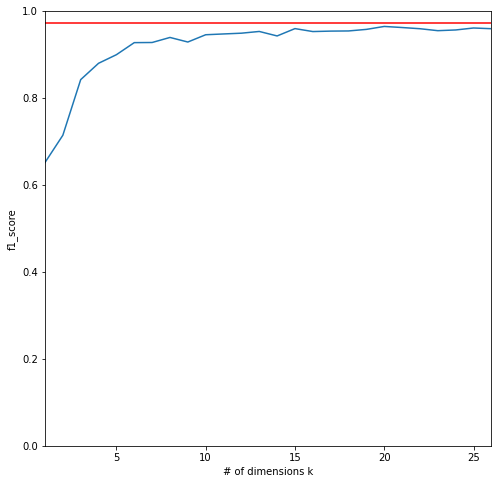

In [50]:
data.plot()